In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('../data/raw/AWS_Honeypot_marx-geo.csv')

In [4]:
df.head(5)

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451581 entries, 0 to 451580
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetime     451581 non-null  object 
 1   host         451581 non-null  object 
 2   src          451581 non-null  int64  
 3   proto        451581 non-null  object 
 4   type         44811 non-null   float64
 5   spt          406770 non-null  float64
 6   dpt          406770 non-null  float64
 7   srcstr       451581 non-null  object 
 8   cc           447985 non-null  object 
 9   country      447947 non-null  object 
 10  locale       342112 non-null  object 
 11  localeabbr   331705 non-null  object 
 12  postalcode   86478 non-null   object 
 13  latitude     448112 non-null  float64
 14  longitude    448153 non-null  float64
 15  Unnamed: 15  83 non-null      float64
dtypes: float64(6), int64(1), object(9)
memory usage: 55.1+ MB


In [6]:
df.describe()

,src,type,spt,dpt,latitude,longitude,Unnamed: 15
count,4.515810e+05,44811.000000,406770.000000,406770.000000,448112.000000,448153.000000,83.000000
mean,2.154902e+09,7.514896,18685.461494,6684.258212,36.214115,48.751751,-77.027536
std,1.081011e+09,1.799866,19290.141746,14032.839799,194.251441,91.774739,0.011942
min,1.677725e+07,0.000000,0.000000,0.000000,-43.533300,-175.000000,-77.059600
25%,1.169129e+09,8.000000,6000.000000,445.000000,30.666700,-4.000000,-77.036400
50%,2.031191e+09,8.000000,6000.000000,1433.000000,35.685000,106.000000,-77.036400
75%,3.164988e+09,8.000000,33461.000000,3389.000000,40.455500,118.777800,-77.014600
max,3.758094e+09,13.000000,65535.000000,65500.000000,20076.000000,178.416700,-77.014600


In [7]:
df.isnull().sum()

datetime            0
host                0
src                 0
proto               0
type           406770
spt             44811
dpt             44811
srcstr              0
cc               3596
country          3634
locale         109469
localeabbr     119876
postalcode     365103
latitude         3469
longitude        3428
Unnamed: 15    451498
dtype: int64

In [8]:
df.shape

(451581, 16)

## Univariate Analysis

<Axes: xlabel='country'>

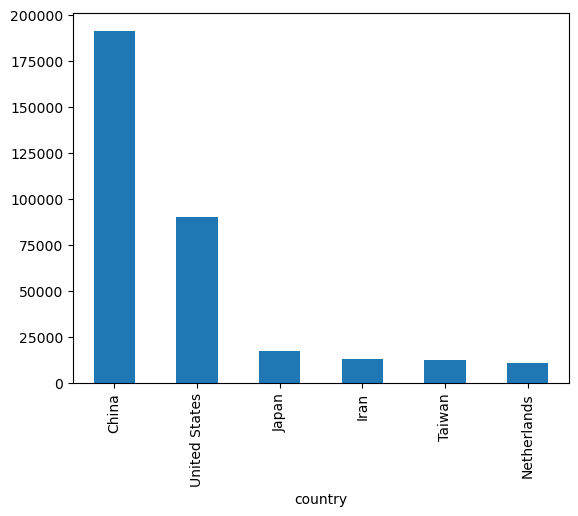

In [9]:
country_type_counts = df["country"].value_counts()
country_type_counts.nlargest(6).plot.bar()

From the graph above we can see that most intrusions comes from #1 China, #2 United States and finally #3 Japan

In [11]:
country_date = df.groupby(["country", "datetime"]).sum()
country_date

host         src     proto  \
country     datetime                                                            
Afghanistan 5/11/13 18:54  groucho-oregongroucho-oregon  4000751708    TCPTCP   
            5/20/13 5:06       zeppo-norcalzeppo-norcal  6052165662    TCPTCP   
            5/28/13 12:08    groucho-tokyogroucho-tokyo  3457844314    TCPTCP   
            9/2/13 0:08                  groucho-sydney  3301177618       TCP   
Albania     3/11/13 16:26    groucho-tokyogroucho-tokyo  3078021124    TCPTCP   
...                                                 ...         ...       ...   
Zimbabwe    4/27/13 23:21             groucho-singapore  3290129478       TCP   
            4/29/13 11:23                groucho-sydney  3290129478       TCP   
            5/26/13 2:58     groucho-tokyogroucho-tokyo  6580265522    TCPTCP   
            7/12/13 10:21                 groucho-tokyo  3290132761       TCP   
            7/24/13 13:39          groucho-eugroucho-eu  6630656452  ICMPICMP   

                           type       spt     dpt  \
country     datetime                                
Afghanistan 5/11/13 18:54   0.0  105824.0   890.0   
            5/20/13 5:06    0.0       0.0   890.0   
            5/28/13 12:08   0.0    8230.0   890.0   
            9/2/13 0:08     0.0   39380.0  1433.0   
Albania     3/11/13 16:26   0.0    6194.0   890.0   
...                         ...       ...     ...   
Zimbabwe    4/27/13 23:21   0.0   54845.0    80.0   
            4/29/13 11:23   0.0   53400.0    80.0   
            5/26/13 2:58    0.0   17684.0   890.0   
            7/12/13 10:21   0.0   44881.0   445.0   
            7/24/13 13:39  16.0       0.0     0.0   

                                                   srcstr    cc      locale  \
country     datetime                                                          
Afghanistan 5/11/13 18:54        119.59.80.46119.59.80.46  AFAF           0   
            5/20/13 5:06         180.94.92.15180.94.92.15  AFAF  KabulKabul   
            5/28/13 12:08        103.13.66.45103.13.66.45  AFAF           0   
            9/2/13 0:08                    196.195.249.18    AF           0   
Albania     3/11/13 16:26        91.187.112.291.187.112.2  ALAL           0   
...                                                   ...   ...         ...   
Zimbabwe    4/27/13 23:21                   196.27.100.70    ZW           0   
            4/29/13 11:23                   196.27.100.70    ZW           0   
            5/26/13 2:58       196.27.113.25196.27.113.25  ZWZW           0   
            7/12/13 10:21                   196.27.113.25    ZW           0   
            7/24/13 13:39  197.155.228.226197.155.228.226  ZWZW           0   

                          localeabbr postalcode  latitude  longitude  \
country     datetime                                                   
Afghanistan 5/11/13 18:54          0          0   66.0000   130.0000   
            5/20/13 5:06      KABKAB          0   69.0334   138.3666   
            5/28/13 12:08          0          0   66.0000   130.0000   
            9/2/13 0:08            0          0   33.0000    65.0000   
Albania     3/11/13 16:26          0          0   82.0000    40.0000   
...                              ...        ...       ...        ...   
Zimbabwe    4/27/13 23:21          0          0  -20.0000    30.0000   
            4/29/13 11:23          0          0  -20.0000    30.0000   
            5/26/13 2:58           0          0  -40.0000    60.0000   
            7/12/13 10:21          0          0  -20.0000    30.0000   
            7/24/13 13:39          0          0  -40.0000    60.0000   

                           Unnamed: 15  
country     datetime                    
Afghanistan 5/11/13 18:54          0.0  
            5/20/13 5:06           0.0  
            5/28/13 12:08          0.0  
            9/2/13 0:08            0.0  
Albania     3/11/13 16:26          0.0  
...                                ...  
Zimbabwe    4/

In [12]:
china_date = country_date.loc["China"]
china_date

,host,src,proto,type,spt,dpt,srcstr,cc,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
datetime,,,,,,,,,,,,,,
3/10/13 0:09,groucho-oregon,3396415787,TCP,0.0,6000.0,1433.0,202.113.49.43,CN,Beijing Shi,11,0,39.9289,116.3883,0.0
3/10/13 0:14,groucho-oregon,3736735509,TCP,0.0,6000.0,1433.0,222.186.15.21,CN,Jiangsu Sheng,32,0,32.0617,118.7778,0.0
3/10/13 0:22,groucho-singapore,1917896806,TCP,0.0,6000.0,1433.0,114.80.200.102,CN,Shanghai Shi,31,0,31.0456,121.3997,0.0
3/10/13 0:23,groucho-singaporegroucho-oregongroucho-sydney,8089816822,TCPTCPTCP,0.0,18000.0,4299.0,218.8.245.179202.113.49.4361.182.168.24,CNCNCN,Heilongjiang ShengBeijing ShiHebei,231113,0,122.2456,357.5716,0.0
3/10/13 0:30,groucho-oregon,1848983007,TCP,0.0,6000.0,1433.0,110.53.61.223,CN,Hunan,43,0,28.1792,113.1136,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/8/13 5:46,groucho-oregon,2102248748,TCP,0.0,6000.0,1433.0,125.77.197.44,CN,Fujian,35,0,26.0614,119.3061,0.0
9/8/13 5:47,groucho-oregon,3416054077,TCP,0.0,62125.0,1433.0,203.156.217.61,CN,0,0,0,35.0000,105.0000,0.0
9/8/13 5:49,groucho-oregon,2006148630,TCP,0.0,6000.0,1433.0,119.147.102.22,CN,Guangdong,44,0,23.1167,113.2500,0.0


<Axes: xlabel='locale'>

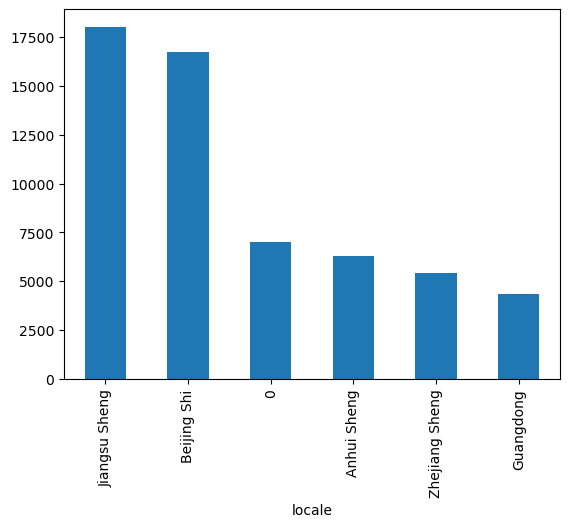

In [13]:
china_date_chart = china_date["locale"].value_counts()
china_date_chart.nlargest(6).plot.bar()

We were able to identify the locale of where the intrusions originated from in China

In [14]:
df.groupby('spt')['country'].count().sort_values(ascending = False)

spt
6000.0     154106
25416.0     18195
10100.0     11116
4445.0       4716
43825.0      2884
            ...  
22525.0         0
55889.0         0
8605.0          0
17978.0         0
35733.0         0
Name: country, Length: 46188, dtype: int64

In [15]:
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)
df

/var/folders/vq/lxr4x9xx73l_snw5_m7z_d300000gn/T/ipykernel_25946/917568786.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["datetime"] = pd.to_datetime(df["datetime"])


,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
datetime,,,,,,,,,,,,,,,
2013-03-03 21:53:00,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
2013-03-03 21:57:00,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2013-03-03 21:58:00,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
2013-03-03 21:58:00,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
2013-03-03 21:58:00,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-08 05:54:00,groucho-oregon,1922977453,TCP,NaN,62175.0,445.0,114.158.78.173,JP,Japan,Tokyo-to,13,NaN,35.6850,139.7514,NaN
2013-09-08 05:50:00,groucho-eu,1017974360,TCP,NaN,6000.0,8090.0,60.173.14.88,CN,China,Anhui Sheng,34,NaN,31.8639,117.2808,NaN
2013-09-08 05:55:00,groucho-oregon,3234358955,TCP,NaN,6000.0,1433.0,192.200.102.171,US,United States,California,CA,90017,34.0530,-118.2642,NaN


In [16]:
df.resample("1D")["spt"].value_counts()

datetime    spt    
2013-03-03  6000.0     43
            57520.0     8
            33367.0     6
            60039.0     3
            3351.0      3
                       ..
2013-09-08  1676.0      1
            1536.0      1
            1329.0      1
            1326.0      1
            1215.0      1
Name: count, Length: 118333, dtype: int64

In [22]:
df.resample("1W")["spt"].value_counts()

datetime    spt    
2013-03-03  6000.0     43
            57520.0     8
            33367.0     6
            2363.0      3
            3351.0      3
                       ..
2013-09-08  49071.0     1
            49076.0     1
            36735.0     1
            4792.0      1
            36775.0     1
Name: count, Length: 108016, dtype: int64

In [23]:
OneMonth = df.resample("1M")["spt"].value_counts()

<Axes: ylabel='datetime,spt'>

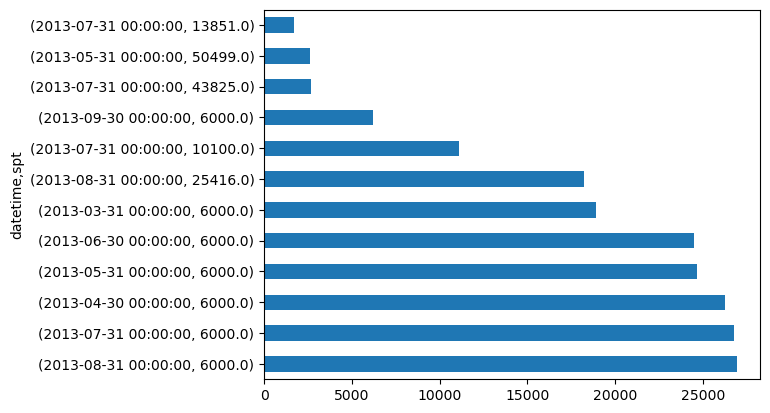

In [25]:
OneMonth.nlargest(12).plot.barh()

The graph above showcases the most frequent intrusions based on SPT and on a per month basis

In [42]:
OneMonthCountry = df.resample("1M")["country"].value_counts()

<Axes: ylabel='datetime,country'>

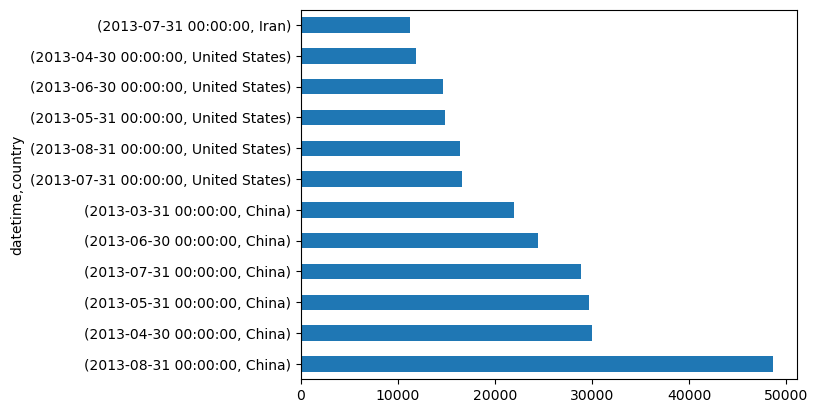

In [44]:
OneMonthCountry.nlargest(12).plot.barh()

The graph above showcases the most frequent intrusions based on country and on a per month basis

<Axes: ylabel='count'>

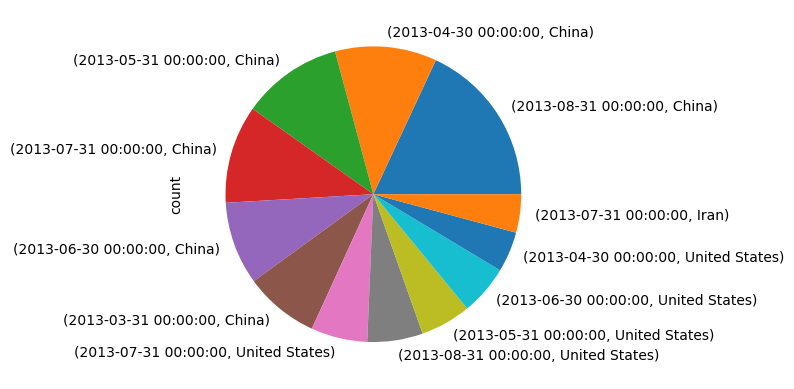

In [45]:
OneMonthCountry.nlargest(12).plot.pie()

In [49]:
OneMonthLocale = df.resample("1M")["locale"].value_counts()

<Axes: ylabel='datetime,locale'>

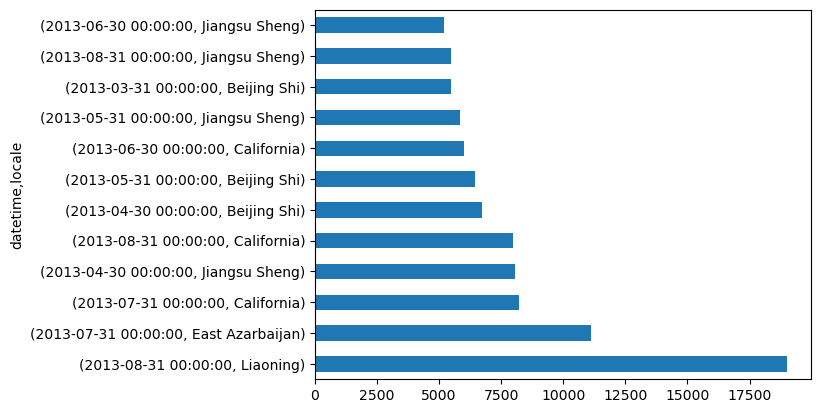

In [50]:
OneMonthLocale.nlargest(12).plot.barh()

The graph above showcases the most frequent intrusions based on locale and on a per month basis

<Axes: ylabel='count'>

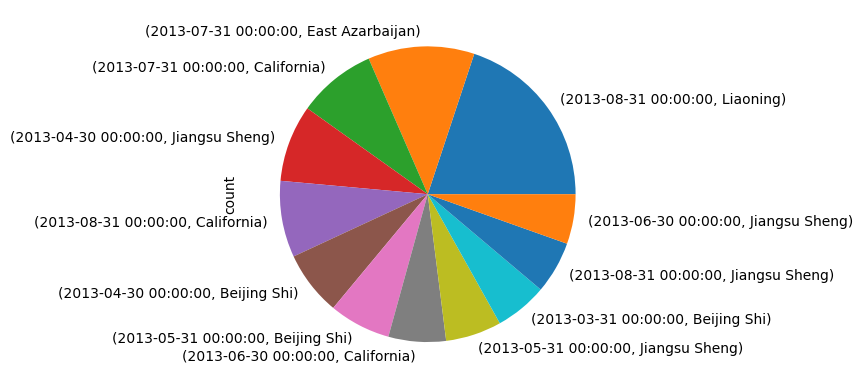

In [51]:
OneMonthLocale.nlargest(12).plot.pie()

<Axes: xlabel='country', ylabel='spt'>

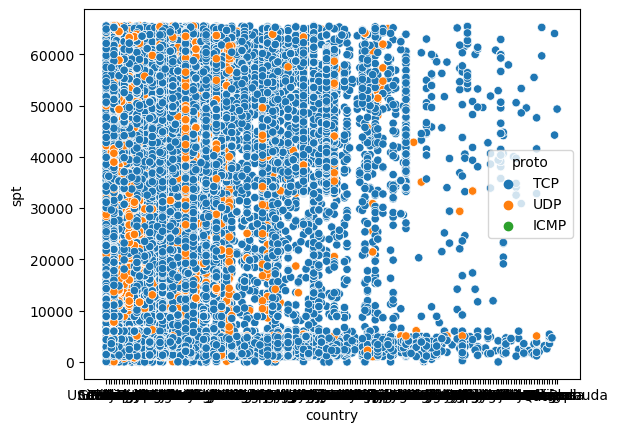

In [19]:
sns.scatterplot(data=df, x="country", y="spt", hue = "proto")

<Axes: xlabel='dpt', ylabel='spt'>

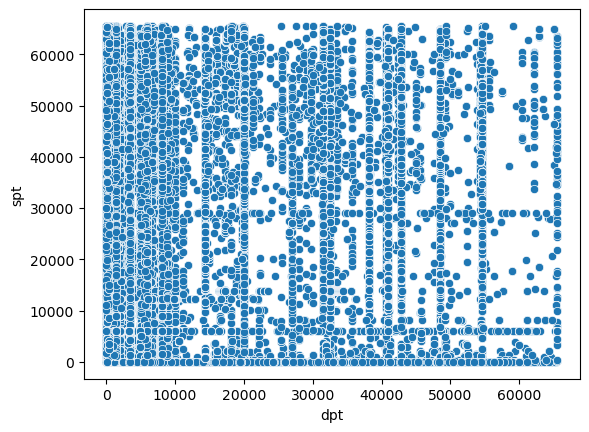

In [20]:
sns.scatterplot(data=df, x="dpt", y="spt")